In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('dark_background')
import tensorflow as tf
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 10)

In [51]:
activation = 'relu'
model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(576, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_232 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_233 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [52]:
history = model.fit(X_train,
        y_train,
        steps_per_epoch = 100,
        epochs = 10,
        batch_size=128,            
        validation_data = (X_test, y_test))

Epoch 1/10
100/100 [==============================] - 23s 217ms/step - loss: 2.0073 - accuracy: 0.3957 - val_loss: 3.1468 - val_accuracy: 0.1372
Epoch 2/10
100/100 [==============================] - 21s 208ms/step - loss: 1.2707 - accuracy: 0.5496 - val_loss: 3.2987 - val_accuracy: 0.1397
Epoch 3/10
100/100 [==============================] - 23s 227ms/step - loss: 1.1412 - accuracy: 0.5978 - val_loss: 4.0759 - val_accuracy: 0.2174
Epoch 4/10
100/100 [==============================] - 22s 216ms/step - loss: 0.9935 - accuracy: 0.6498 - val_loss: 3.3019 - val_accuracy: 0.2594
Epoch 5/10
100/100 [==============================] - 23s 229ms/step - loss: 0.8276 - accuracy: 0.7066 - val_loss: 1.9844 - val_accuracy: 0.4267
Epoch 6/10
100/100 [==============================] - 22s 221ms/step - loss: 0.8384 - accuracy: 0.7045 - val_loss: 1.3755 - val_accuracy: 0.5502
Epoch 7/10
100/100 [==============================] - 22s 216ms/step - loss: 0.8122 - accuracy: 0.7141 - val_loss: 1.3599 - val_ac

In [54]:
model3_drop_norm = Sequential()
model3_drop_norm.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())

model3_drop_norm.add(MaxPooling2D((2, 2)))
model3_drop_norm.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(MaxPooling2D((2, 2)))

model3_drop_norm.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())

model3_drop_norm.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(MaxPooling2D((2, 2)))

model3_drop_norm.add(Flatten())
model3_drop_norm.add(Dense(640, activation='relu', kernel_initializer='he_uniform'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Dense(10, activation='softmax'))
# compile model

model3_drop_norm.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model3_drop_norm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_242 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_243 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [55]:
history = model3_drop_norm.fit(X_train,
        y_train,
        steps_per_epoch = 100,
        epochs = 10,
        batch_size=128,            
        validation_data = (X_test, y_test))

Epoch 1/10
100/100 [==============================] - 26s 249ms/step - loss: 1.7183 - accuracy: 0.4349 - val_loss: 2.7225 - val_accuracy: 0.1671
Epoch 2/10
100/100 [==============================] - 25s 251ms/step - loss: 1.2491 - accuracy: 0.5577 - val_loss: 3.9537 - val_accuracy: 0.1539
Epoch 3/10
100/100 [==============================] - 28s 279ms/step - loss: 1.1089 - accuracy: 0.6156 - val_loss: 2.4941 - val_accuracy: 0.2666
Epoch 4/10
100/100 [==============================] - 25s 247ms/step - loss: 1.0013 - accuracy: 0.6450 - val_loss: 1.7676 - val_accuracy: 0.4121
Epoch 5/10
100/100 [==============================] - 25s 253ms/step - loss: 0.8453 - accuracy: 0.7030 - val_loss: 1.4836 - val_accuracy: 0.5136
Epoch 6/10
100/100 [==============================] - 25s 254ms/step - loss: 0.8164 - accuracy: 0.7149 - val_loss: 1.1955 - val_accuracy: 0.6065
Epoch 7/10
100/100 [==============================] - 25s 254ms/step - loss: 0.7993 - accuracy: 0.7219 - val_loss: 1.0101 - val_ac

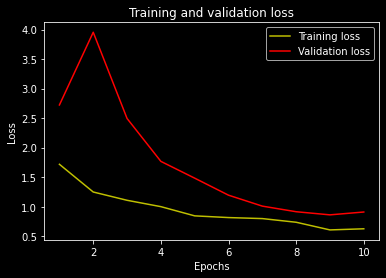

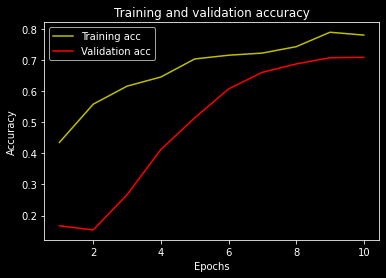

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
